# Social Network Analysis

This notebook will show you how to analyze networks and visualize their structure.  In particular, it can analyze  networks where nodes are people and a link represents an organizations where two people belong.  YIBO: is this right? Yes or no. This notebook can be applied to any objects that have network relationships.

The notebook uses the [networkx](https://networkx.github.io) library to store the network structure, and the [matplotlib](https://matplotlib.org) library to visualize the results.

The following cell contains some predefined functions to process networks. Please make sure you have run this cell before you run other cells in this notebook.

In [10]:
import networkx as nx
import itertools
import matplotlib.pyplot as plt
#import matplotlib as mpl
#mpl.rcParams['figure.figsize'] = (10,10)

def loadOrganization(filename):
    with open(filename) as f:
        data=f.readlines()
        features=data[0].rstrip().split(',')[1:]
        values=[entry.rstrip().split(',')[1:] for entry in data[1:]]
        return features,values

def Organization_Visualization():
    plt.clf()
    filename=input('Please Enter the File Name:')
    features,values=loadOrganization(filename)
    g=nx.Graph()
    weightedNodes={}
    for value in values:
        lst=[]
        for index,node in enumerate(value):
            if node=='1':
                lst.append(features[index])
        for i in itertools.combinations(lst,2):
            weightedNodes[i]=weightedNodes.get(i,0) + 1
    for nodes,weights in weightedNodes.items():
        #print nodes,weights
        g.add_edge(*nodes,weight=weights*0.4)
    n=nx.number_of_nodes(g)
    pos=nx.spring_layout(g,k=n**(-1./3))  
    edges = g.edges()
    weights = [g[u][v]['weight'] for u,v in edges]
    nx.draw(g,pos,with_labels = True,node_color="#E69F00",width=weights,font_size=8,font_color='#0F0C82',edge_color="#A9A9A9")
    filename=filename[:-4]+'_organization.png'
    plt.savefig(filename,dpi=300)
    plt.show()   

def loadPeople(filename):
    Organization_People={}
    with open(filename) as f:
        data=f.readlines()
        features=data[0].rstrip().split(',')[1:]
        values=[entry.rstrip().split(',') for entry in data[1:]]
        for i in range(len(features)):
            persons=[]
            for value in values:
                if value[i+1]=='1':
                    persons.append(value[0])
            Organization_People[features[i]]=persons
        return Organization_People

def People_Visualization():
    plt.clf()
    filename=input('Please Enter the File Name:')
    Organization_People=loadPeople(filename)
    g=nx.Graph()
    for organization in Organization_People.keys():
        for i in itertools.combinations(Organization_People[organization],2):
            g.add_edge(*i)
    n=nx.number_of_nodes(g)
    pos=nx.spring_layout(g,k=n**(-1./3))    
    nx.draw(g,pos=pos,with_labels = True,width=0.05,linewidths=0.2,node_color="#E69F00",node_size=4,font_size=4,font_color='#0F0C82',edge_color="#A9A9A9")
    filename=filename[:-4]+'_people.png'
    plt.savefig(filename,dpi=300) 
    plt.show()

def loadHead():
    import pandas as pd
    df=pd.read_csv('./Social Network Analysis/Revolution.txt')
    with pd.option_context('display.max_columns', None):
        display(df.head())

## Exploring the data
Before we start to visualize the social network data, let's know how it looks like first. Run the following cell and it will show you the head of "Revolution.txt". Every row represents a person in the revolution. Every column represents a club. If there is a '1' in a specific column, namely a club, this means a person belongs to this club. Therefore, we can analyze the social network from two perspectives, the organization perspective and the people perspective. 

In the orgaization network, the visualization will display the relationships among various clubs. The more members two clubs shared, the thicker the edge between them would be.   
In the people network, the visualization will display the relationships among various people. If two people were in the same club, there would be an edge between them. The more clubs a person stayed at, the more edges he or she would have between other people.  

*The two sociel network analysis functions are very general and not limited to represent the relationsips among people and clubs. It can represent relationships amony any entities and the organizations that the entities belong to.*Yibo

In [17]:
loadHead()

,Unnamed: 0,StAndrewsLodge,LoyalNine,NorthCaucus,LongRoomClub,TeaParty,BostonCommittee,LondonEnemies
0,Adams.John,0,0,1,1,0,0,0
1,Adams.Samuel,0,0,1,1,0,1,1
2,Allen.Dr,0,0,1,0,0,0,0
3,Appleton.Nathaniel,0,0,1,0,0,1,0
4,Ash.Gilbert,1,0,0,0,0,0,0


## Organization Visualization##
The following cell visualizes the organization network between your data entries. When you are prompted to input the data, please make sure your dataset follows the same format of "Revolution.txt" and "HighSchoolClubs.txt".

YIBO: This does not explain how the data is formatted.  Overall, this notebook should have a similar structure to the Parallel Coordinates notebook.

Please Enter the File Name:./Social Network Analysis/Revolution.txt


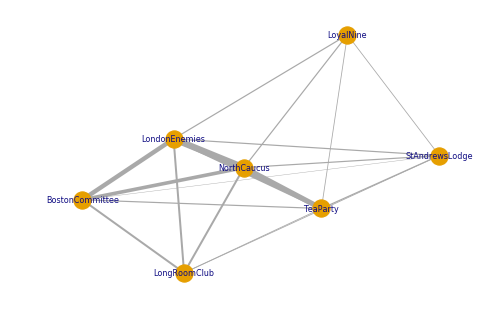

In [11]:
Organization_Visualization()

## People Visualization##
The following cell visualizes the people network between your data entries. When you are prompted to input the data, please make sure your dataset follows the same format of "Revolution.txt" and "HighSchoolClubs.txt".

Tips: if you cannot see the picture very clearly, it has been saved at the same folder of this notebook.

YIBO: can the visualization be made bigger?

Please Enter the File Name:./Social Network Analysis/Revolution.txt


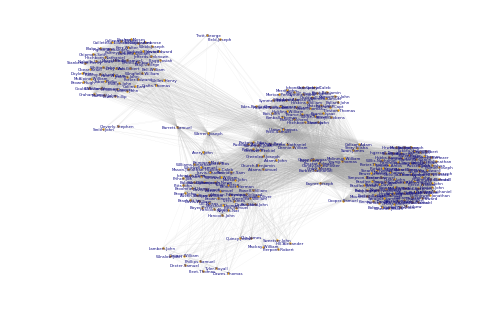

In [12]:
People_Visualization()